Tarea :

Es un problema de regresión: tenéis que predecir el precio del airbnb utilizando los datos
disponibles.
1. Preparación de datos: División train/test
2. Análisis exploratorio, por ejemplo:
a. Head, describe, dtypes, etc.
b. Outliers
c. Correlación
3. Preprocesamiento:
a. Eliminación de variables, mediante selección (random forest/Lasso), alta
correlación, alto porcentaje de missings, o el método que se considere
oportuno.
b. Generación de variables
4. Modelado:
a. Cross validation
KeepCoding© All rights reserved.
www.keepcoding.io
b. Evaluación; mejor si lo hacéis de más de un modelo, porque así podéis
comparar entre ellos.
5. Conclusión: escrita, no numérica; un par de líneas es más que suficiente.

In [1]:
""" 
Importamos las librerías que vamos a utilizar

"""
import numpy  as np  # linear algebra
import pandas as pd  # data processing

import matplotlib.pyplot as plt   # visulalitation
%matplotlib inline

## 1. Preparación de datos: División train/test
        Antes de la division train/test debemos entender bien el dataset y eliminar las columnas que no nos aportan nada

In [2]:
airbnb_data = pd.read_csv("C:/Users/Pablo/OneDrive/Keepcoding/12. Machine Learning/Proyecto/airbnb-listings-extract.csv", sep=";") # cargamos fichero

                  # visualizamos 5 primeras filas

El Dataset: visión global

In [3]:
print(f'La variable "airbnb_data" que representa todo el dataset es de tipo:  {type(airbnb_data)}')
print(f'el número de muestras del Dataset es {airbnb_data.shape[0]}')
print(f'La dimensionalidad (nº columnas) de todo el Dataset es {airbnb_data.shape[1]}')
airbnb_data.head(2)       

La variable "airbnb_data" que representa todo el dataset es de tipo:  <class 'pandas.core.frame.DataFrame'>
el número de muestras del Dataset es 14780
La dimensionalidad (nº columnas) de todo el Dataset es 89


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."


Para pre-selección de carácterísticas me quedo con aquellas que no son datos descriptivos, URLs, IDs, etc..


In [4]:
# características para entrenar el modelo de Machine Learning

features = ['Host Response Rate', 'Zipcode', 'Latitude', 'Longitude', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Square Feet', 'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
 'Minimum Nights', 'Maximum Nights','Availability 30', 'Availability 60','Availability 90', 'Availability 365','Number of Reviews', 'First Review', 'Price',
 'Last Review','Review Scores Rating', 'Review Scores Accuracy','Review Scores Cleanliness', 'Review Scores Checkin','Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 'Cancellation Policy']

airbnb_data_pre_selection = airbnb_data[features]
print(f'Número de features pre seleccionados : {airbnb_data_pre_selection.shape[1]}')

Número de features pre seleccionados : 31


Ahora, con el dataset limpio divido train/test

In [5]:
from sklearn.model_selection import train_test_split
#partición de nuestro dataset entero en train y test
train_full, test_full = train_test_split(airbnb_data_pre_selection, test_size=0.2, shuffle=True, random_state=0)

#Guardamos en CSV
train_full.to_csv("train_full.csv", sep=';',decimal='.', index= False)
test_full.to_csv("test_full.csv", sep=';',decimal='.', index= False)

Comprobamos que todo está correcto

In [6]:
#Comprobación de partición train-test correcta
comprobacion_train = len(airbnb_data)*0.8 == len(train_full)
comprobacion_test = len(airbnb_data)*0.2 == len(test_full)
print(f'la partición es correcta : {comprobacion_train and comprobacion_test}')
print(f'shape de train: {train_full.shape}')
print(f'shape de test: {test_full.shape}')


la partición es correcta : True
shape de train: (11824, 31)
shape de test: (2956, 31)


A partir de ahora solo trabajamos con el dataset de train y únicamente usamos test para evaluar el modelo

In [7]:
# cargamos el dataset de train 
house_data_train = pd.read_csv('C:/Users/Pablo/OneDrive/Keepcoding/12. Machine Learning/Proyecto/train_full.csv', sep=';', decimal='.')

## 2. ANÁLISIS EXPLORATORIO
     Analizamos con el dataset de train:
        - Outliers
        - relación entre variables
        - Relación entre variables y target
        - Valores nulos
        - descarte otras características
        - Imputación de valores

In [8]:
# Información dataset 
house_data_train.info()

# Elimino variable Square Feet y Security Deposit por tener casi todo valores nulos

# variables categóricas:  Zipcode, First Review, Last Review, Cancellation Policy
""""
Elimino variables categóricos por facilitar ejercicio. Pendiente investigar y codificarlas con Encoder.
Cancellation policy puede ser interesante para ver relaciones con el precio

"""
house_data_train_selected = house_data_train.drop(['Square Feet','Zipcode','First Review','Last Review','Security Deposit','Cancellation Policy'], axis='columns') 
house_data_train_selected.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Host Response Rate           10317 non-null  float64
 1   Zipcode                      11426 non-null  object 
 2   Latitude                     11824 non-null  float64
 3   Longitude                    11824 non-null  float64
 4   Accommodates                 11824 non-null  int64  
 5   Bathrooms                    11780 non-null  float64
 6   Bedrooms                     11804 non-null  float64
 7   Beds                         11787 non-null  float64
 8   Square Feet                  474 non-null    float64
 9   Security Deposit             5052 non-null   float64
 10  Cleaning Fee                 6974 non-null   float64
 11  Guests Included              11824 non-null  int64  
 12  Extra People                 11824 non-null  int64  
 13  Minimum Nights  

(11824, 25)

In [9]:
# Información dataset seleccionado
house_data_train_selected.info()

# Variables a los que voy a imputar valores: 
imputacion_nulos = ['Host Response Rate', 'Bathrooms', 'Bedrooms','Beds','Cleaning Fee','Review Scores Rating', 
                    'Review Scores Accuracy','Review Scores Cleanliness', 'Review Scores Checkin', 'Review Scores Communication',
                     'Review Scores Location', 'Review Scores Value' ] 



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11824 entries, 0 to 11823
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Host Response Rate           10317 non-null  float64
 1   Latitude                     11824 non-null  float64
 2   Longitude                    11824 non-null  float64
 3   Accommodates                 11824 non-null  int64  
 4   Bathrooms                    11780 non-null  float64
 5   Bedrooms                     11804 non-null  float64
 6   Beds                         11787 non-null  float64
 7   Cleaning Fee                 6974 non-null   float64
 8   Guests Included              11824 non-null  int64  
 9   Extra People                 11824 non-null  int64  
 10  Minimum Nights               11824 non-null  int64  
 11  Maximum Nights               11824 non-null  int64  
 12  Availability 30              11824 non-null  int64  
 13  Availability 60 

In [10]:
# Les imputo el valor de la moda a cada uno de los valores nulos.
for i in imputacion_nulos:
    if i in house_data_train_selected.columns:
        moda= house_data_train_selected[i].mode()[0]
        house_data_train_selected[i] = house_data_train_selected[i].fillna(moda)


In [11]:
#house_data_train_selected.info()

print(f'La variable a predecir "y" tiene {house_data_train_selected["Price"].isnull().sum()} valores nulos')

# Eliminamos los 15 registros que tienen valores nulos en la variable a predecir 'Price'
house_data_train_selected = house_data_train_selected.dropna(subset='Price')


La variable a predecir "y" tiene 15 valores nulos


In [12]:
#Volvemos a comprobar
house_data_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11809 entries, 0 to 11823
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Host Response Rate           11809 non-null  float64
 1   Latitude                     11809 non-null  float64
 2   Longitude                    11809 non-null  float64
 3   Accommodates                 11809 non-null  int64  
 4   Bathrooms                    11809 non-null  float64
 5   Bedrooms                     11809 non-null  float64
 6   Beds                         11809 non-null  float64
 7   Cleaning Fee                 11809 non-null  float64
 8   Guests Included              11809 non-null  int64  
 9   Extra People                 11809 non-null  int64  
 10  Minimum Nights               11809 non-null  int64  
 11  Maximum Nights               11809 non-null  int64  
 12  Availability 30              11809 non-null  int64  
 13  Availability 60      

¿Hemos perdido muchos datos con la eliminación?

In [13]:
print(
    f'Original: {house_data_train.shape[0]} // '
    f'Modificado: {house_data_train_selected.shape[0]}\nDiferencia: {house_data_train.shape[0] - house_data_train_selected.shape[0]}'
)
print(f'Variación: {((house_data_train.shape[0] - house_data_train_selected.shape[0])/house_data_train.shape[0])*100:2f}%')

Original: 11824 // Modificado: 11809
Diferencia: 15
Variación: 0.126861%


Eliminación de outliers y Exploración Gráfica variables más importantesvisualización

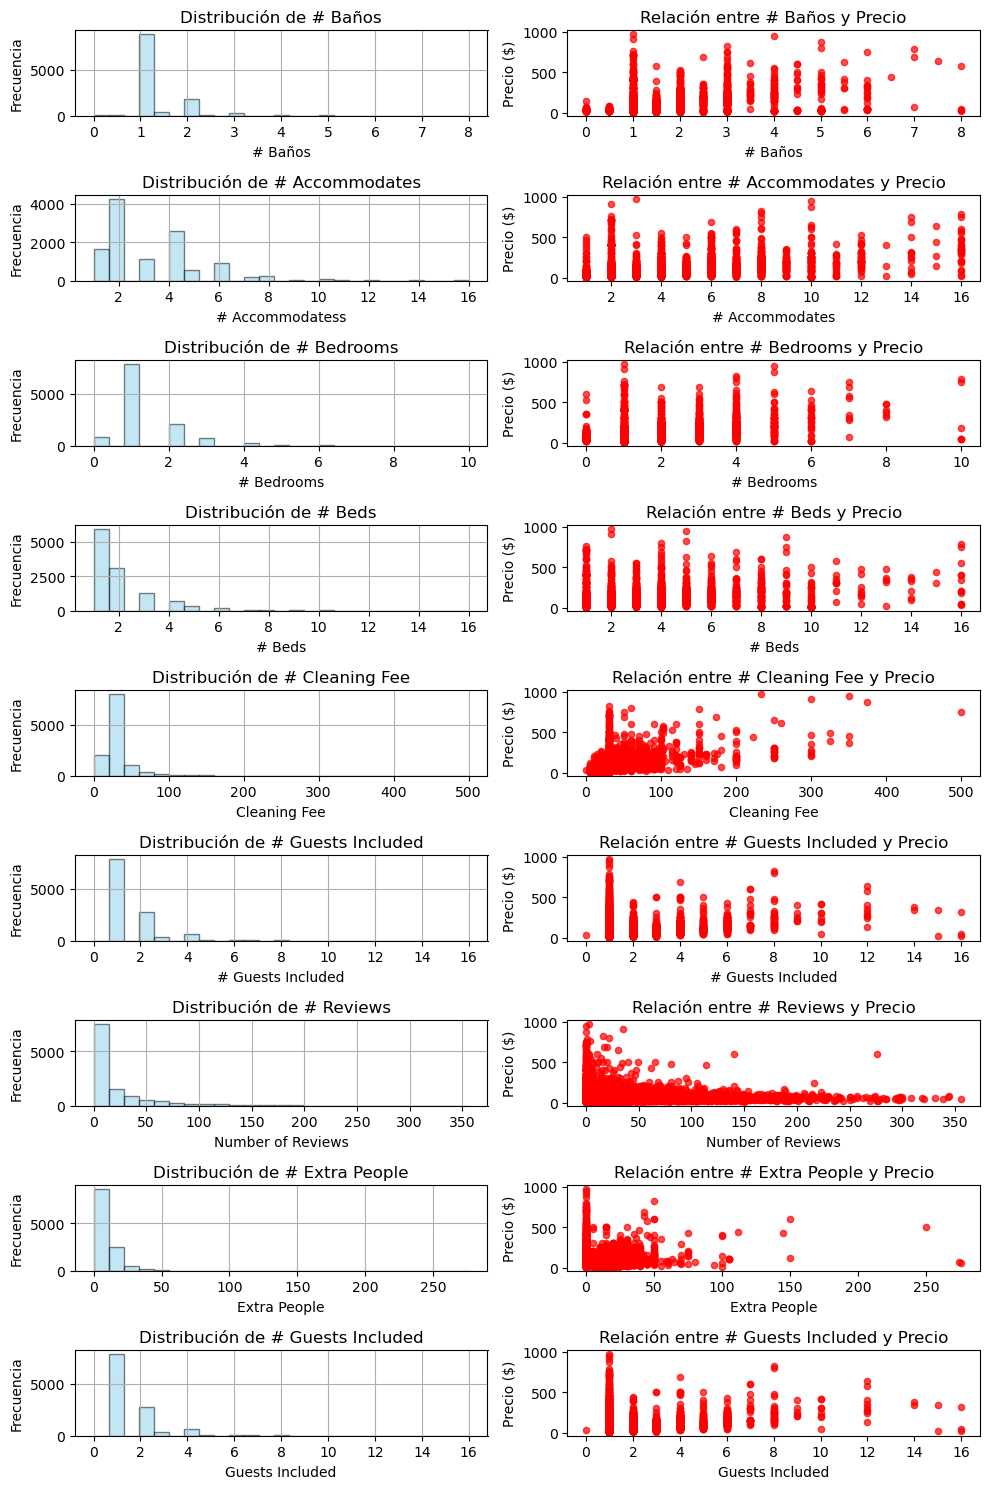

In [14]:
import matplotlib.pyplot as plt

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 15))

# Primer gráfico: Histograma de baños
plt.subplot(9,2, 1)  # Crear el primer subplot
house_data_train_selected['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de # Baños')
plt.xlabel('# Baños')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de baños vs precio
plt.subplot(9, 2, 2)  # Crear el segundo subplot
house_data_train_selected.plot(kind='scatter', x='Bathrooms', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Baños y Precio')
plt.xlabel('# Baños')
plt.ylabel('Precio ($)')

#---------------------------------------------------

# Primer gráfico: Histograma de accommodates
plt.subplot(9,2, 3)  # Crear el primer subplot
house_data_train_selected['Accommodates'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de # Accommodates')
plt.xlabel('# Accommodatess')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de accommodates vs precio
plt.subplot(9, 2, 4)  # Crear el segundo subplot
house_data_train_selected.plot(kind='scatter', x='Accommodates', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Accommodates y Precio')
plt.xlabel('# Accommodates')
plt.ylabel('Precio ($)')

#---------------------------------------------------

# Primer gráfico: Histograma de Bedrooms
plt.subplot(9,2, 5)  # Crear el primer subplot
house_data_train_selected['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de # Bedrooms')
plt.xlabel('# Bedrooms')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de Bedrooms vs precio
plt.subplot(9, 2, 6)  # Crear el segundo subplot
house_data_train_selected.plot(kind='scatter', x='Bedrooms', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Bedrooms y Precio')
plt.xlabel('# Bedrooms')
plt.ylabel('Precio ($)')

#---------------------------------------------------

# Primer gráfico: Histograma de Beds
plt.subplot(9,2, 7)  # Crear el primer subplot
house_data_train_selected['Beds'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de # Beds')
plt.xlabel('# Beds')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de Beds vs precio
plt.subplot(9, 2, 8)  # Crear el segundo subplot
house_data_train_selected.plot(kind='scatter', x='Beds', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Beds y Precio')
plt.xlabel('# Beds')
plt.ylabel('Precio ($)')

#---------------------------------------------------

# Primer gráfico: Histograma de Cleaning Fee	
plt.subplot(9,2, 9)  # Crear el primer subplot
house_data_train_selected['Cleaning Fee'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de # Cleaning Fee')
plt.xlabel('Cleaning Fee')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de Cleaning Fee	 vs precio
plt.subplot(9, 2, 10)  # Crear el segundo subplot
house_data_train_selected.plot(kind='scatter', x='Cleaning Fee', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Cleaning Fee y Precio')
plt.xlabel('Cleaning Fee')
plt.ylabel('Precio ($)')

#---------------------------------------------------

# Primer gráfico: Histograma de Guests Included	
plt.subplot(9,2, 11)  # Crear el primer subplot
house_data_train_selected['Guests Included'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de # Guests Included')
plt.xlabel('# Guests Included')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de Guests Included	 vs precio
plt.subplot(9, 2, 12)  # Crear el segundo subplot
house_data_train_selected.plot(kind='scatter', x='Guests Included', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Guests Included y Precio')
plt.xlabel('# Guests Included')
plt.ylabel('Precio ($)')

#---------------------------------------------------

# Primer gráfico: Histograma de Number of Reviews	
plt.subplot(9,2, 13)  # Crear el primer subplot
house_data_train_selected['Number of Reviews'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de # Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de Number of Reviews vs precio
plt.subplot(9, 2, 14)  # Crear el segundo subplot
house_data_train_selected.plot(kind='scatter', x='Number of Reviews', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Reviews y Precio')
plt.xlabel('Number of Reviews')
plt.ylabel('Precio ($)')

#---------------------------------------------------

# Primer gráfico: Histograma de Extra People	
plt.subplot(9,2, 15)  # Crear el primer subplot
house_data_train_selected['Extra People'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de # Extra People')
plt.xlabel('Extra People')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de Extra People vs precio
plt.subplot(9, 2, 16)  # Crear el segundo subplot
house_data_train_selected.plot(kind='scatter', x='Extra People', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Extra People y Precio')
plt.xlabel('Extra People')
plt.ylabel('Precio ($)')

#---------------------------------------------------

# Primer gráfico: Histograma de Guests Included	
plt.subplot(9,2, 17)  # Crear el primer subplot
house_data_train_selected['Guests Included'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de # Guests Included')
plt.xlabel('Guests Included')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de Guests Included vs precio
plt.subplot(9, 2, 18)  # Crear el segundo subplot
house_data_train_selected.plot(kind='scatter', x='Guests Included', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Guests Included y Precio')
plt.xlabel('Guests Included')
plt.ylabel('Precio ($)')

# Mostrar los gráficos
plt.tight_layout()
plt.show()



In [15]:
house_data_train_selected.describe()


,Host Response Rate,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Guests Included,Extra People,...,Availability 365,Number of Reviews,Price,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value
count,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,...,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000,11809.000000
mean,95.486578,40.485979,-3.784060,3.273605,1.282835,1.342027,2.043357,31.094165,1.580574,7.557710,...,202.196799,22.680752,73.712592,93.507918,9.543399,9.474130,9.709459,9.727750,9.640359,9.390380
std,14.288163,4.695057,14.020002,2.088509,0.659375,0.900803,1.615993,22.681777,1.153438,11.160882,...,127.977302,38.108399,71.624844,8.772974,0.861417,0.928524,0.724040,0.688644,0.704804,0.909076
min,0.000000,-37.851182,-123.124429,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,9.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,100.000000,40.409757,-3.707543,2.000000,1.000000,1.000000,1.000000,20.000000,1.000000,0.000000,...,78.000000,1.000000,34.000000,90.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,100.000000,40.419315,-3.700771,3.000000,1.000000,1.000000,2.000000,30.000000,1.000000,0.000000,...,240.000000,7.000000,55.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,100.000000,40.430754,-3.683962,4.000000,1.000000,2.000000,2.000000,30.000000,2.000000,15.000000,...,319.000000,27.000000,87.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,100.000000,55.966912,153.371427,16.000000,8.000000,10.000000,16.000000,500.000000,16.000000,276.000000,...,365.000000,356.000000,969.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


 Limpieza Dataset:

In [16]:
#Exploración variable Accommodates:
#Accomodates : Son outliers a partir de 10 accomodates? 
mayor_que10 = house_data_train_selected['Accommodates']>10
mayor_que10.sum()

110

In [17]:
# Elimino todos los registros que contienen Accomodadtes > 10
house_data_train_selected.shape

house_data_train_selected_Accomodates_filter = house_data_train_selected[house_data_train_selected['Accommodates']<=10]
house_data_train_selected_Accomodates_filter.shape

(11699, 25)

¿Hemos perdido muchos datos con la eliminación?

In [18]:
print(
    f'Original: {house_data_train.shape[0]} // '
    f'Modificado: {house_data_train_selected_Accomodates_filter.shape[0]}\nDiferencia: {house_data_train.shape[0] - house_data_train_selected_Accomodates_filter.shape[0]}'
)
print(f'Variación: {((house_data_train.shape[0] - house_data_train_selected_Accomodates_filter.shape[0])/house_data_train.shape[0])*100:2f}%')

Original: 11824 // Modificado: 11699
Diferencia: 125
Variación: 1.057172%


Las variables que hacen referncia a las reviews no aportan : Casi todos los valores son 10, por lo que eliminanos todas

In [19]:
house_data_train_selected = house_data_train_selected_Accomodates_filter
house_data_train_selected.shape

(11699, 25)

In [20]:
Col_eliminar = ['Review Scores Rating','Review Scores Accuracy', 'Review Scores Cleanliness',
       'Review Scores Checkin', 'Review Scores Communication','Review Scores Location', 'Review Scores Value']

house_data_train_selected = house_data_train_selected.drop(Col_eliminar, axis='columns')
house_data_train_selected.shape


(11699, 18)

In [21]:
house_data_train_selected.columns

Index(['Host Response Rate', 'Latitude', 'Longitude', 'Accommodates',
       'Bathrooms', 'Bedrooms', 'Beds', 'Cleaning Fee', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Price'],
      dtype='object')

In [22]:
house_data_train_selected.describe().T

,count,mean,std,min,25%,50%,75%,max
Host Response Rate,11699.0,95.470724,14.317680,0.000000,100.000000,100.000000,100.000000,100.000000
Latitude,11699.0,40.488145,4.715953,-37.851182,40.409790,40.419393,40.430837,55.966912
Longitude,11699.0,-3.795797,14.039556,-123.124429,-3.707546,-3.700778,-3.684210,153.371427
Accommodates,11699.0,3.179588,1.849059,1.000000,2.000000,2.000000,4.000000,10.000000
Bathrooms,11699.0,1.262458,0.606067,0.000000,1.000000,1.000000,1.000000,8.000000
Bedrooms,11699.0,1.308830,0.816629,0.000000,1.000000,1.000000,2.000000,10.000000
Beds,11699.0,1.971280,1.402022,1.000000,1.000000,1.000000,2.000000,16.000000
Cleaning Fee,11699.0,30.875630,22.126828,0.000000,20.000000,30.000000,30.000000,375.000000
Guests Included,11699.0,1.547226,1.027018,0.000000,1.000000,1.000000,2.000000,16.000000
Extra People,11699.0,7.495598,11.117929,0.000000,0.000000,0.000000,14.000000,276.000000


Ahora tengo mi dataset train con las características que considero importantes. 
realizamos la matriz de correlación para ver si hay columnas que sean muy relacionales y decidir si elimino o no. 

In [23]:
house_data_train_selected.corr()

,Host Response Rate,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Price
Host Response Rate,1.000000,-0.018661,0.009428,0.042261,-0.030538,0.008563,0.021391,0.019613,0.054388,0.028689,0.011498,0.000784,-0.132912,-0.122393,-0.115149,-0.053911,0.103045,0.004605
Latitude,-0.018661,1.000000,-0.498721,0.009469,-0.004470,-0.010108,0.002200,-0.015568,0.007464,0.019124,-0.003259,0.000013,-0.019095,-0.021977,-0.024373,-0.006330,0.018428,-0.011594
Longitude,0.009428,-0.498721,1.000000,0.016893,0.021162,0.034010,0.030382,-0.031749,-0.014890,-0.052867,-0.004652,0.002423,0.010179,0.005146,0.000547,-0.008120,-0.023908,0.004689
Accommodates,0.042261,0.009469,0.016893,1.000000,0.337512,0.677434,0.804202,0.282816,0.534748,0.255966,0.007492,-0.002729,-0.041293,-0.047016,-0.062711,0.072446,0.073400,0.482054
Bathrooms,-0.030538,-0.004470,0.021162,0.337512,1.000000,0.449286,0.389354,0.222961,0.166418,0.072069,0.030903,-0.002822,0.020773,-0.003142,-0.012952,0.010464,-0.075158,0.311620
Bedrooms,0.008563,-0.010108,0.034010,0.677434,0.449286,1.000000,0.685917,0.298001,0.381191,0.126698,0.021211,-0.002556,0.010785,-0.011788,-0.032276,0.016715,-0.043163,0.432660
Beds,0.021391,0.002200,0.030382,0.804202,0.389354,0.685917,1.000000,0.254102,0.408091,0.186651,0.008539,-0.002959,0.027037,0.013687,-0.005840,0.087195,0.027718,0.382936
Cleaning Fee,0.019613,-0.015568,-0.031749,0.282816,0.222961,0.298001,0.254102,1.000000,0.164160,0.080219,0.081287,-0.003964,0.009122,-0.009826,-0.021769,0.060668,-0.062678,0.473307
Guests Included,0.054388,0.007464,-0.014890,0.534748,0.166418,0.381191,0.408091,0.164160,1.000000,0.364218,0.002934,-0.004794,-0.071732,-0.059607,-0.057855,0.058876,0.118554,0.254457
Extra People,0.028689,0.019124,-0.052867,0.255966,0.072069,0.126698,0.186651,0.080219,0.364218,1.000000,-0.019932,-0.005421,0.046587,0.058072,0.063049,0.113788,0.079234,0.099831


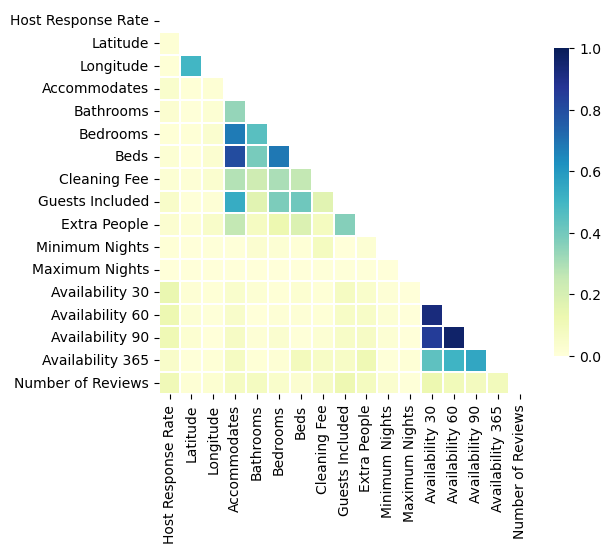

In [24]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(house_data_train_selected.drop(['Price'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

La matriz de correlación indica alta relación en : 
 1. Availability 30 - Availability 60 - Availability 90 -Availability 365 
 2. Accomodates - beds - bedrooms

    

In [25]:
"""
Para facilitar el ejercicio voy a elminar todas la características menos: Availability 365 y beds. 
Pendiente analizar yver si merece la pena generar caracterísitcas nuevas
"""

house_data_train_selected = house_data_train_selected.drop(['Availability 30', 'Availability 60', 'Availability 90','Accommodates','Bedrooms'], axis= 'columns')         
house_data_train_selected.shape


(11699, 13)

## 3. PREPROCESAMIENTO SELECCIÓN DE VARIABLES
Combinamos todo el preprocesamiento de train en una celda

In [26]:
# Carga de datos

train_path = 'C:/Users/Pablo/OneDrive/Keepcoding/12. Machine Learning/Proyecto/train_full.csv'
house_data_train = pd.read_csv(train_path, sep=';', decimal='.')

# Eliminamos caracterísitcas

col_drop = ['Square Feet','Zipcode','First Review','Last Review','Security Deposit','Cancellation Policy',
            'Review Scores Rating','Review Scores Accuracy', 'Review Scores Cleanliness',
            'Review Scores Checkin', 'Review Scores Communication','Review Scores Location','Review Scores Value','Availability 30', 
            'Availability 60', 'Availability 90','Accommodates','Bedrooms']

house_data_train = house_data_train.drop(col_drop, axis='columns')


# Eliminamos los 15 registros que tienen valores nulos en la variable a predecir 'Price'
house_data_train = house_data_train.dropna(subset='Price')

#Imputación
imputacion_nulos = ['Host Response Rate', 'Bathrooms','Beds','Cleaning Fee']

for i in imputacion_nulos:
    if i in house_data_train.columns:
        moda= house_data_train[i].mode()[0]
        house_data_train[i].fillna(moda, inplace=True)

house_data_train.shape

(11809, 13)

Combinamos todo el preprocesamiento de test en una celda

In [27]:
# Carga de datos

test_path = 'C:/Users/Pablo/OneDrive/Keepcoding/12. Machine Learning/Proyecto/test_full.csv'
house_data_test = pd.read_csv(test_path, sep=';', decimal='.')

# Eliminamos caracterísitcas

col_drop = ['Square Feet','Zipcode','First Review','Last Review','Security Deposit','Cancellation Policy',
            'Review Scores Rating','Review Scores Accuracy', 'Review Scores Cleanliness',
            'Review Scores Checkin', 'Review Scores Communication','Review Scores Location','Review Scores Value','Availability 30', 
            'Availability 60', 'Availability 90','Accommodates','Bedrooms']

house_data_test = house_data_test.drop(col_drop, axis='columns')


# Eliminamos los 15 registros que tienen valores nulos en la variable a predecir 'Price'
house_data_test = house_data_test.dropna(subset='Price')

#Imputación
imputacion_nulos = ['Host Response Rate', 'Bathrooms','Beds','Cleaning Fee']
for i in imputacion_nulos:
    if i in house_data_test.columns:
        moda= house_data_test[i].mode()[0]
        house_data_test[i].fillna(moda, inplace=True)

house_data_test.shape

(2954, 13)

Preparamos datos para el modelo

In [28]:
from sklearn import preprocessing

# Dataset de train
data_train = house_data_train.values
y_train = data_train[:,-1:].ravel()      # nos quedamos con la última columna, price, 
X_train = data_train[:,:-1]            # nos quedamos con el resto

# Dataset de test
data_test = house_data_test.values
y_test = data_test[:,-1:].ravel()      # nos quedamos con la última columna, price, 
X_test = data_test[:,:-1]      # nos quedamos con el resto

In [29]:
house_data_train.head()

,Host Response Rate,Latitude,Longitude,Bathrooms,Beds,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Price
0,100.0,40.407732,-3.684819,1.0,2.0,25.0,1,0,2,1125,117,12,60.0
1,100.0,40.415802,-3.705340,1.0,2.0,15.0,1,0,1,1125,208,20,50.0
2,100.0,40.389048,-3.740374,1.5,8.0,5.0,1,0,3,30,140,0,10.0
3,100.0,40.412814,-3.703052,3.0,1.0,30.0,1,0,10,1125,311,0,30.0
4,100.0,40.438631,-3.713716,1.0,1.0,30.0,1,10,1,1125,337,97,32.0


Escalamos los datos de train

In [30]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [31]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (11809, 12)
Datos test:  (2954, 12)


buscamos los parámetros óptimos mediante Lasso y Cross Validation

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................................alpha=0.1; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ..........................alpha=0.37926901907322497; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END ............................alpha=1.438449888287663; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45559478116852; total time=   0.0s
[CV] END .............................alpha=5.45

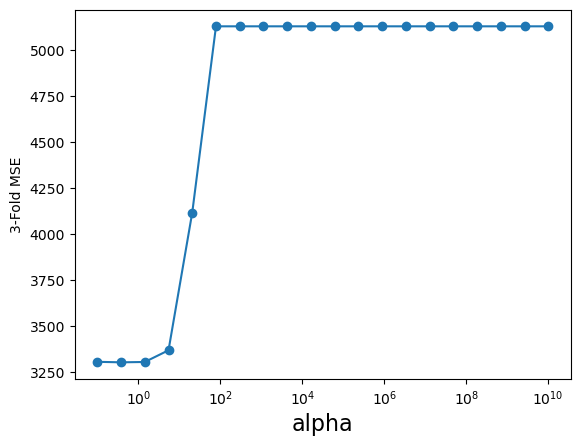

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

alpha_vector = np.logspace(-1,10,20)
param_grid = {'alpha': alpha_vector }
grid = GridSearchCV(Lasso(), scoring= 'neg_mean_squared_error', param_grid=param_grid, cv = 3, verbose=2)
grid.fit(XtrainScaled, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

#-1 porque es negado
scores = -1*np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(alpha_vector,scores,'-o')
plt.xlabel('alpha',fontsize=16)
plt.ylabel('3-Fold MSE')
plt.show()

Volvemos a entrenar con el valor óptimo de alpha

In [33]:
from sklearn.metrics import mean_squared_error

alpha_optimo = grid.best_params_['alpha']
lasso = Lasso(alpha = alpha_optimo).fit(XtrainScaled,y_train)

ytrainLasso = lasso.predict(XtrainScaled)
ytestLasso  = lasso.predict(XtestScaled)
mseTrainModelLasso = mean_squared_error(y_train,ytrainLasso)
mseTestModelLasso = mean_squared_error(y_test,ytestLasso)

print('MSE Modelo Lasso (train): %0.3g' % mseTrainModelLasso)
print('MSE Modelo Lasso (test) : %0.3g' % mseTestModelLasso)

print('RMSE Modelo Lasso (train): %0.3g' % np.sqrt(mseTrainModelLasso))
print('RMSE Modelo Lasso (test) : %0.3g' % np.sqrt(mseTestModelLasso))

feature_names = house_data_train.columns[:-1] # es igual en train y en test

w = lasso.coef_
for f,wi in zip(feature_names,w):
    print(f,wi)

MSE Modelo Lasso (train): 3.28e+03
MSE Modelo Lasso (test) : 3.13e+03
RMSE Modelo Lasso (train): 57.2
RMSE Modelo Lasso (test) : 55.9
Host Response Rate -0.0843007068324074
Latitude -0.0857351469760443
Longitude 0.0
Bathrooms 11.475700635327625
Beds 15.864597598387666
Cleaning Fee 25.524994298659053
Guests Included 6.902228657042948
Extra People -0.4702754261626285
Minimum Nights -0.1726139619372895
Maximum Nights 0.0
Availability 365 0.3200644613602342
Number of Reviews -2.1307139095784784


Las variables que me selecciona el modelo regularizaciòn de Lasso son:
1. Bathrooms
2. Beds
3. Cleaning fee
4. Guests Included

Vamos a recuperar los histogramas para ver las relaciones con el precio: 


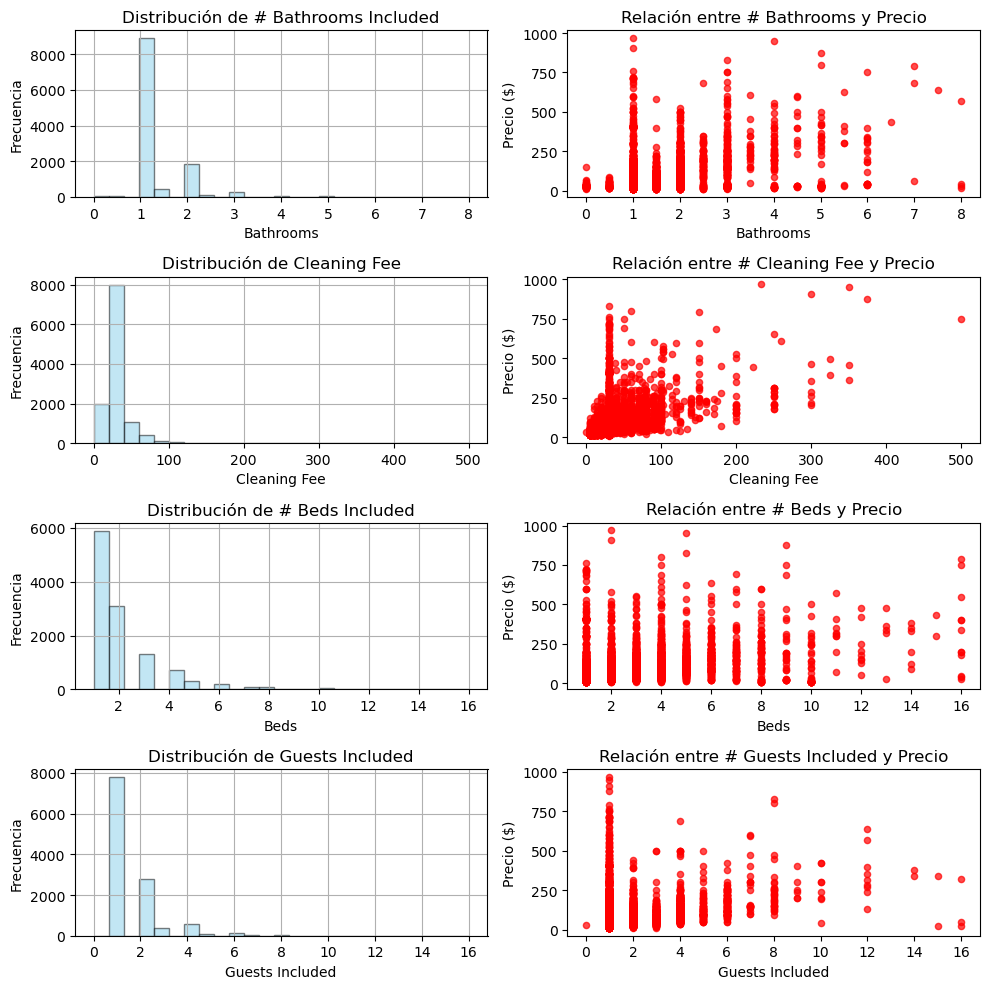

In [34]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 10))

# Primer gráfico: Histograma de Bathrooms
plt.subplot(4,2, 1)  # Crear el primer subplot
house_data_train['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de # Bathrooms Included')
plt.xlabel('Bathrooms')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de Bathrooms vs precio
plt.subplot(4, 2, 2)  # Crear el segundo subplot
house_data_train.plot(kind='scatter', x='Bathrooms', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Bathrooms y Precio')
plt.xlabel('Bathrooms')
plt.ylabel('Precio ($)')


#------------------------------

# Primer gráfico: Cleaning Fee
plt.subplot(4,2, 3)  # Crear el primer subplot
house_data_train['Cleaning Fee'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de Cleaning Fee')
plt.xlabel('Cleaning Fee')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de Cleaning Fee vs precio
plt.subplot(4, 2, 4)  # Crear el segundo subplot
house_data_train.plot(kind='scatter', x='Cleaning Fee', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Cleaning Fee y Precio')
plt.xlabel('Cleaning Fee')
plt.ylabel('Precio ($)')


#------------------------------

# Primer gráfico: Histograma de Beds
plt.subplot(4,2, 5)  # Crear el primer subplot
house_data_train['Beds'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de # Beds Included')
plt.xlabel('Beds')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de Beds vs precio
plt.subplot(4, 2, 6)  # Crear el segundo subplot
house_data_train.plot(kind='scatter', x='Beds', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Beds y Precio')
plt.xlabel('Beds')
plt.ylabel('Precio ($)')


#------------------------------

# Primer gráfico: Histograma de Guests Included
plt.subplot(4,2, 7)  # Crear el primer subplot
house_data_train['Guests Included'].plot.hist(alpha=0.5, bins=25, grid=True, color='skyblue', edgecolor='black')
plt.title('Distribución de Guests Included')
plt.xlabel('Guests Included')
plt.ylabel('Frecuencia')

# Segundo gráfico: Scatter plot de Guests Included vs precio
plt.subplot(4, 2, 8)  # Crear el segundo subplot
house_data_train.plot(kind='scatter', x='Guests Included', y='Price', ax=plt.gca(), color='red', alpha=0.7)
plt.title('Relación entre # Guests Included y Precio')
plt.xlabel('Guests Included')
plt.ylabel('Precio ($)')

# Mostrar los gráficos
plt.tight_layout()
plt.show()



Vamos a probar a entrenar con random Forest para poder comparar resultados de ambos modelos y quedarnos con el que menos error cuadrático medio nos arroje

Fitting 3 folds for each of 19 candidates, totalling 57 fits
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=1; total time=   0.4s
[CV] END ........................................max_depth=1; total time=   0.3s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=2; total time=   0.4s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END ........................................max_depth=3; total time=   0.5s
[CV] END ........................................max_depth=4; total time=   0.6s
[CV] END ........................................max_depth=4; total time=   0.6s
[CV] END .......................................

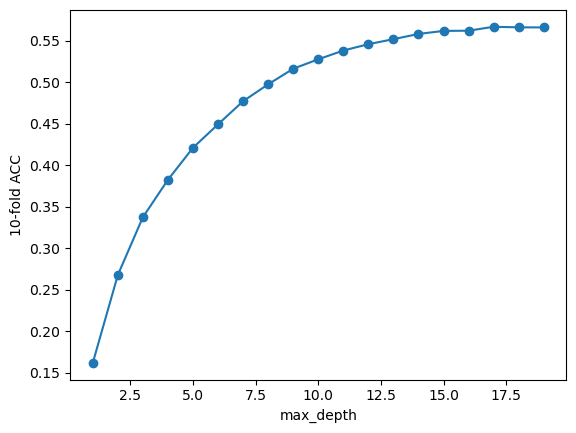

In [35]:
from sklearn.ensemble import RandomForestRegressor

maxDepth = range(1,20)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

Ahora entreno el modelo Random Forest con el mejor parámetro obtenido

In [36]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

Train:  0.8882212916330381
Test:  0.6442092811252498


Estos datos sugieren que tengo overfitiing.
Vamos aver las variables más importantes

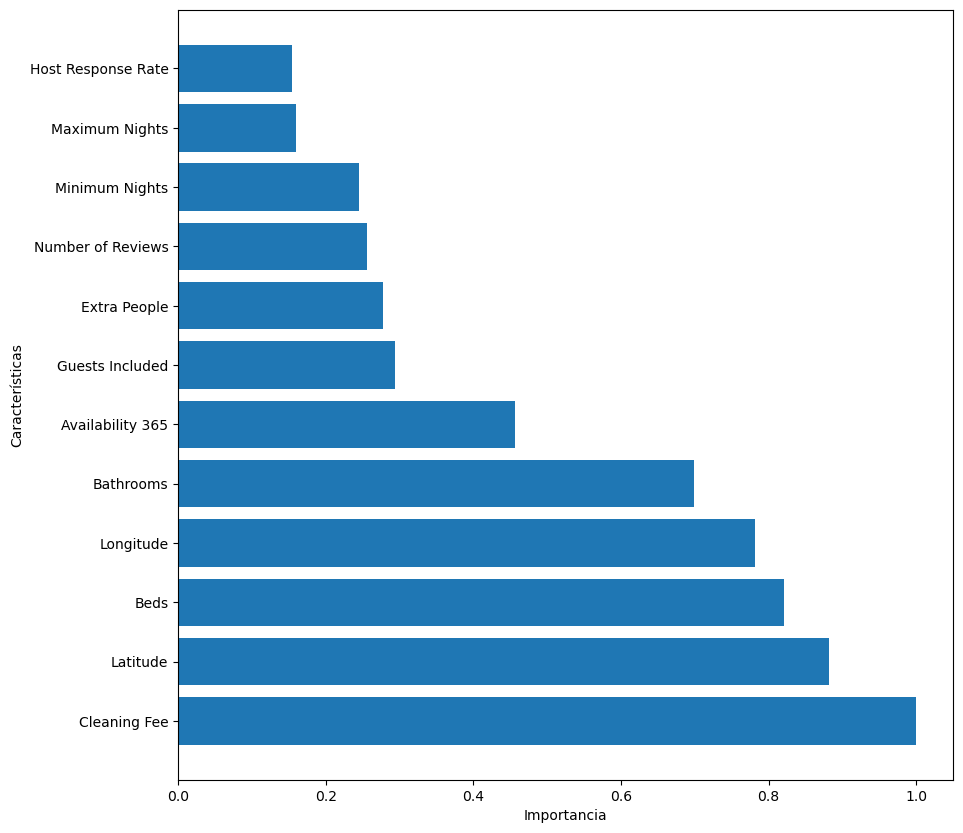

In [37]:
# Selección de características
features = house_data_train.drop(['Price'], axis='columns')
feature_names = features.columns  #  nombres de las columnas

# Entrenamiento del modelo Random Forest
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo, n_estimators=200, max_features='sqrt')
randomForest.fit(X_train, y_train)

# Importancia de características
importances = randomForest.feature_importances_
importances = importances / np.max(importances)
indices = np.argsort(importances)[::-1]  # Orden descendente

# Visualización
plt.figure(figsize=(10, 10))
plt.barh(range(X_train.shape[1]), importances[indices])
plt.yticks(range(X_train.shape[1]), [feature_names[i] for i in indices])  #  nombres ordenados
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()


utilizamos el ranking para hacer selcción de las características:

In [38]:
from sklearn.model_selection import KFold

N,Nfeatures = X_train.shape

rf = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt')
kf  = KFold(n_splits=10, shuffle = True, random_state=1)
cv_error = []
cv_std = []

for nfeatures in range(Nfeatures,0,-1):
        
    error_i = []
    
    for idxTrain, idxVal in kf.split(X_train):
        
        Xt = X_train[idxTrain,:]
        yt = y_train[idxTrain]
        Xv = X_train[idxVal,:]
        yv = y_train[idxVal]
        
        rf.fit(Xt,yt)
        
        ranking = rf.feature_importances_
        indices = np.argsort(ranking)[::-1] 
    
        selected = indices[0:(Nfeatures-nfeatures+1)]
        
        Xs = Xt[:,selected]
        
        rf.fit(Xs,yt)
        error = (1.0-rf.score(Xv[:,selected],yv))     
        error_i.append(error) 
    
    cv_error.append(np.mean(error_i))
    cv_std.append(np.std(error_i))
    
    print('# features ' + str(len(selected)) + ' error ' + str(np.mean(error_i)) + ' +/- ' + str(np.std(error_i)))

# features 1 error 0.7671163762243612 +/- 0.047738625359205596
# features 2 error 0.7365366289172636 +/- 0.059958405874027086
# features 3 error 0.6470379737527012 +/- 0.04599402549023751
# features 4 error 0.5557134704781582 +/- 0.05019791477335738
# features 5 error 0.4878486729369119 +/- 0.05012360476770879
# features 6 error 0.470713179814363 +/- 0.04822786488144551
# features 7 error 0.4656088356270504 +/- 0.0403273754640782
# features 8 error 0.43585030201481373 +/- 0.05324559005147692
# features 9 error 0.4282273515170619 +/- 0.05230783864263882
# features 10 error 0.42047828436740087 +/- 0.05565217785527515
# features 11 error 0.4162217451221089 +/- 0.05522811373312461
# features 12 error 0.4093711279502987 +/- 0.04963456958784605


Representamos en una gráfica y escogemos las 4 características más relevantes para entrenar nuestro modelo: 

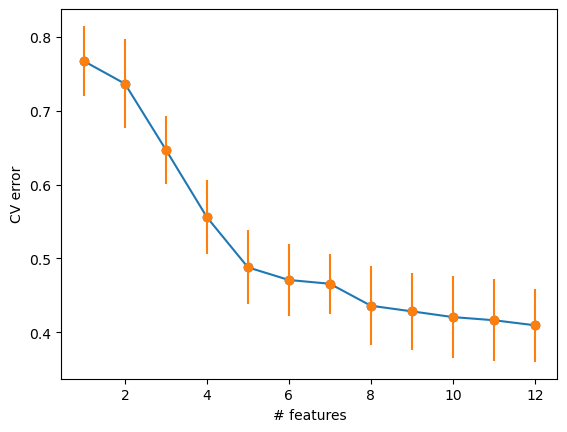

In [39]:
plt.plot(range(1,Nfeatures+1,1),cv_error,'-o')
plt.errorbar(range(1,Nfeatures+1,1), cv_error, yerr=cv_std, fmt='o')
plt.xlabel('# features')
plt.ylabel('CV error')
plt.show()

Hemos conseguido aumentar 1 punto porcentual en train, pero el Test sigue siendo muy bajo

## 4.MODELADO
Vamos a comparar los modelos de Random Forest y KNN con Cross Validation y con las features seleccionadas 

Random Forest

In [40]:
nfeatures = 4

rf = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200, max_features='sqrt')

rf.fit(X_train,y_train)

ranking = rf.feature_importances_
indices = np.argsort(ranking)[::-1] 

selected = indices[0:(Nfeatures-nfeatures+1)]

Xs = X_train[:,selected]

rf_s = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200, max_features='sqrt')
rf_s.fit(Xs,y_train)

print("Train: ",rf_s.score(Xs,y_train))
print("Test: ",rf_s.score(X_test[:, selected],y_test))

Train:  0.894915173434711
Test:  0.6405093879116714


Ahora probamos entrenar el modelo con el algortimo : k-nearest neighbors (KNN)

In [41]:
# Carga de datos

train_path = 'C:/Users/Pablo/OneDrive/Keepcoding/12. Machine Learning/Proyecto/train_full.csv'
house_data_train = pd.read_csv(train_path, sep=';', decimal='.')

# Eliminamos caracterísitcas

col_drop = ['Square Feet','Zipcode','First Review','Last Review','Security Deposit','Cancellation Policy',
            'Review Scores Rating','Review Scores Accuracy', 'Review Scores Cleanliness',
            'Review Scores Checkin', 'Review Scores Communication','Review Scores Location','Review Scores Value','Availability 30', 
            'Availability 60', 'Availability 90','Accommodates','Bedrooms', 'Host Response Rate','Bathrooms', 'Guests Included',
            'Extra People','Minimum Nights','Maximum Nights','Availability 365','Number of Reviews']

house_data_train = house_data_train.drop(col_drop, axis='columns')


# Eliminamos los 15 registros que tienen valores nulos en la variable a predecir 'Price'
house_data_train = house_data_train.dropna(subset='Price')

#Imputación
imputacion_nulos = ['Host Response Rate', 'Bathrooms','Beds','Cleaning Fee']

for i in imputacion_nulos:
    if i in house_data_train.columns:
        moda= house_data_train[i].mode()[0]
        house_data_train[i].fillna(moda, inplace=True)

house_data_train.shape

(11809, 5)

In [42]:
house_data_train

,Latitude,Longitude,Beds,Cleaning Fee,Price
0,40.407732,-3.684819,2.0,25.0,60.0
1,40.415802,-3.705340,2.0,15.0,50.0
2,40.389048,-3.740374,8.0,5.0,10.0
3,40.412814,-3.703052,1.0,30.0,30.0
4,40.438631,-3.713716,1.0,30.0,32.0
...,...,...,...,...,...
11819,40.430559,-3.717107,2.0,16.0,52.0
11820,40.391126,-3.754068,3.0,30.0,55.0
11821,40.416271,-3.713093,1.0,30.0,69.0
11822,40.413397,-3.711280,1.0,25.0,69.0


In [43]:
# Carga de datos

test_path = 'C:/Users/Pablo/OneDrive/Keepcoding/12. Machine Learning/Proyecto/test_full.csv'
house_data_test = pd.read_csv(test_path, sep=';', decimal='.')

# Eliminamos caracterísitcas

col_drop = ['Square Feet','Zipcode','First Review','Last Review','Security Deposit','Cancellation Policy',
            'Review Scores Rating','Review Scores Accuracy', 'Review Scores Cleanliness',
            'Review Scores Checkin', 'Review Scores Communication','Review Scores Location','Review Scores Value','Availability 30', 
            'Availability 60', 'Availability 90','Accommodates','Bedrooms', 'Host Response Rate','Bathrooms', 'Guests Included',
            'Extra People','Minimum Nights','Maximum Nights','Availability 365','Number of Reviews']

house_data_test = house_data_test.drop(col_drop, axis='columns')


# Eliminamos los 15 registros que tienen valores nulos en la variable a predecir 'Price'
house_data_test = house_data_test.dropna(subset='Price')

#Imputación
imputacion_nulos = ['Host Response Rate', 'Bathrooms','Beds','Cleaning Fee']
for i in imputacion_nulos:
    if i in house_data_test.columns:
        moda= house_data_test[i].mode()[0]
        house_data_test[i].fillna(moda, inplace=True)

house_data_test.shape

(2954, 5)

In [44]:
house_data_test.shape

(2954, 5)

In [45]:
from sklearn import preprocessing

# Dataset de train
data_train = house_data_train.values
y_train = data_train[:,-1:].ravel()      # nos quedamos con la última columna, price, 
X_train = data_train[:,:-1]            # nos quedamos con el resto

# Dataset de test
data_test = house_data_test.values
y_test = data_test[:,-1:].ravel()      # nos quedamos con la última columna, price, 
X_test = data_test[:,:-1]      # nos quedamos con el resto

In [46]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [47]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (11809, 4)
Datos test:  (2954, 4)


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

param_grid = {'n_neighbors':  np.arange(1, 16, 1)}
grid = GridSearchCV(KNeighborsRegressor(), scoring='neg_mean_squared_error', param_grid=param_grid, cv = 5, verbose=2).fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(-grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n

In [50]:
n_neighbours = grid.best_params_['n_neighbors']
knn = KNeighborsRegressor(n_neighbors= n_neighbours).fit(X_train, y_train)

train_score = knn.score(X_train, y_train)
test_score = knn.score(X_test, y_test)

print("Best train score: {:.3f}".format(train_score))
print("Best test score: {:.3f}".format(test_score))

Best train score: 0.520
Best test score: 0.471


## 4. CONCLUSIONES

A lo largo de este ejercicio de ML hemos realizado los siguientes pasos: 

1. Entender el Dataset con el que vamos a trabajar : buscar información de todas las características y eliminar aquellas que no son útiles para la predicción  
2. Preparación de datos: División del dataset en train y test. A partir de ahora solo trabjamos en train hasta la evaluación de prestaciones finales.  
3. Análisis exploratorio: Outliers, correlación entre variables, visualización de datos,  etc..   
4. Preprocesamiento: Selección de características y búsqueda de valores óptimos. Lasso Vs Random Forest  
5. Modelado: Cross Validation y evaluación final con test. comparación en varios modelos (Random forest, k-Nearest Neighbors (KNN))  

Una vez realizado los pasos anteriores, el modelo que mejor prestación ofrece es Random Forest, con el siguiente resultado:  

 **Train**:  0.8882212916330381  
 **Test**:  0.6442092811252498

Esto resultado sugiere una revisión, atendiendo especialemnte al **overfiting**, dado que, el modelo tiene un desempeño alto en el conjunto de entrenamiento, pero, sin embargo, el desempeño del modelo en los datos de test es significativamente menor que en los datos de entrenamiento.
Para evitar el overfitting debo seguir una de estas 2 estrategias: 

1. Regularización: penalizar coeficientes grandes.  
2. Selección de características: reducir la dimensionalidad del problema.  

En ambos casos, se busca reducir la complejidad del modelo. Pero será a costa de aumentar el sesgo.



     

Mejoras a implementar para optimizar el desempeño del modelo:   
1. Tratamiento de variables categóricas: codificar estas variables y estudiar si son relevantes o no.
2. Generación de características nuevas: Evaluar transformaciones de las características dadas o simplificación de conjunto de características en una sola.  
3. Entrenamiento, evaluación de desempeño y comparación con más modelos.








